## Problem Statement 

#### Prepare a classification model using Naive Bayes for salary data.

### Import all the required libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading train set
df_train=pd.read_csv('SalaryData_Train.csv.crdownload')
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# Loading test set
df_test=pd.read_csv('SalaryData_Test.csv')
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18039 entries, 0 to 18038
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            18039 non-null  int64 
 1   workclass      18039 non-null  object
 2   education      18039 non-null  object
 3   educationno    18039 non-null  int64 
 4   maritalstatus  18039 non-null  object
 5   occupation     18039 non-null  object
 6   relationship   18039 non-null  object
 7   race           18039 non-null  object
 8   sex            18039 non-null  object
 9   capitalgain    18039 non-null  int64 
 10  capitalloss    18039 non-null  int64 
 11  hoursperweek   18039 non-null  int64 
 12  native         18039 non-null  object
 13  Salary         18039 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.9+ MB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [6]:
df_train['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [7]:
print('Shape of train dataframe before dropping duplicates',df_train.shape)
print('Shape of test dataframe before dropping duplicates',df_test.shape)

Shape of train dataframe before dropping duplicates (18039, 14)
Shape of test dataframe before dropping duplicates (15060, 14)


In [8]:
df_train.drop_duplicates(keep=False,inplace=True)

In [9]:
df_test.drop_duplicates(keep=False,inplace=True)

In [10]:
print('Shape of train dataframe after dropping duplicates',df_train.shape)
print('Shape of test dataframe after dropping duplicates',df_test.shape)


Shape of train dataframe after dropping duplicates (15714, 14)
Shape of test dataframe after dropping duplicates (13450, 14)


In [11]:
df_train.drop('native',axis=1,inplace=True)

In [12]:
df_test.drop('native',axis=1,inplace=True)

In [13]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K


In [14]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,<=50K


In [15]:
# Label Encoding Categorical Columns of train and test dataset

from sklearn import preprocessing

# Making a list of categorical columns
cols=['workclass','education','maritalstatus','occupation','relationship','race','sex','Salary']  

le=preprocessing.LabelEncoder()
for col in cols:
    
    df_train[col]=le.fit_transform(df_train[col])
    df_test[col]=le.fit_transform(df_test[col])
    print(le.classes_)

[' Federal-gov' ' Local-gov' ' Private' ' Self-emp-inc'
 ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']
[' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']
[' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']
[' Husband' ' Not-in-family' ' Other-relative' ' Own-child' ' Unmarried'
 ' Wife']
[' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Black' ' Other' ' White']
[' Female' ' Male']
[' <=50K' ' >50K']


In [16]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,0
1,50,4,9,13,2,3,0,4,1,0,0,13,0
2,38,2,11,9,0,5,1,4,1,0,0,40,0
3,53,2,1,7,2,5,0,2,1,0,0,40,0
4,28,2,9,13,2,9,5,2,0,0,0,40,0


In [17]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,0
1,38,2,11,9,2,4,0,4,1,0,0,50,0
2,28,1,7,12,2,10,0,4,1,0,0,40,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,1
4,34,2,0,6,4,7,1,4,1,0,0,30,0


In [18]:
## Checking output column of train dataset
df_train['Salary'].value_counts()

0    11732
1     3982
Name: Salary, dtype: int64

In [19]:
print("Percent of data labelled as 0:",((df_train['Salary']==0).sum()/len(df_train)*100))
print("Percent of data labelled as 1:",((df_train['Salary']==1).sum()/len(df_train)*100))

Percent of data labelled as 0: 74.65953926435026
Percent of data labelled as 1: 25.34046073564974


### Feature selection on train dataset using Extra Trees Classifier.

In [20]:
x=df_train.iloc[:,:-1]
y=df_train.iloc[:,-1]

In [21]:
# checking target type
from sklearn.utils.multiclass import type_of_target
type_of_target(y)

'binary'

In [22]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators=10)
model.fit(x,y)
print(model.feature_importances_)

[0.22136759 0.05619631 0.03942804 0.08333369 0.06736475 0.09625114
 0.10256973 0.01960565 0.03042114 0.1159511  0.03505299 0.13245788]


In [23]:
cols=['age','workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek']
feature_imp=pd.Series(model.feature_importances_,index=cols).sort_values(ascending=False)
feature_imp

age              0.221368
hoursperweek     0.132458
capitalgain      0.115951
relationship     0.102570
occupation       0.096251
educationno      0.083334
maritalstatus    0.067365
workclass        0.056196
education        0.039428
capitalloss      0.035053
sex              0.030421
race             0.019606
dtype: float64

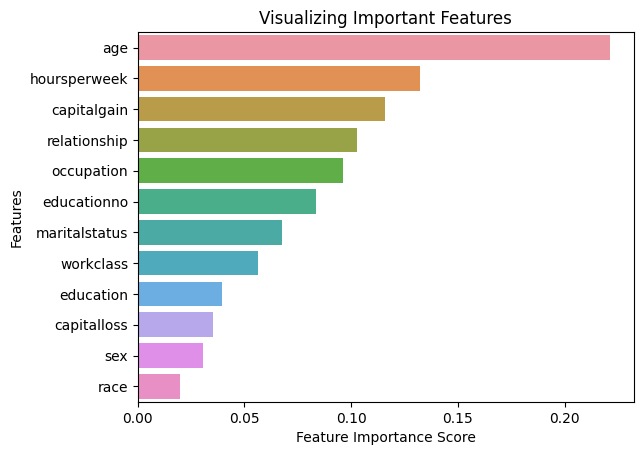

In [24]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()


In [25]:
## Dropping the fivecolumns having least feature importance
df_train.drop(['workclass','education','capitalloss','sex','race'],axis=1,inplace=True)

In [26]:
## dropping the same columns from test dataset
df_test.drop(['workclass','education','capitalloss','sex','race'],axis=1,inplace=True)

In [27]:
df_train.head()

,age,educationno,maritalstatus,occupation,relationship,capitalgain,hoursperweek,Salary
0,39,13,4,0,1,2174,40,0
1,50,13,2,3,0,0,13,0
2,38,9,0,5,1,0,40,0
3,53,7,2,5,0,0,40,0
4,28,13,2,9,5,0,40,0


In [28]:
df_test.head()

,age,educationno,maritalstatus,occupation,relationship,capitalgain,hoursperweek,Salary
0,25,7,4,6,3,0,40,0
1,38,9,2,4,0,0,50,0
2,28,12,2,10,0,0,40,1
3,44,10,2,6,0,7688,40,1
4,34,6,4,7,1,0,30,0


In [29]:
df_train[['age','capitalgain','hoursperweek']].describe()

,age,capitalgain,hoursperweek
count,15714.000000,15714.000000,15714.000000
mean,39.232468,1233.740550,41.155594
std,13.245956,7888.007098,12.377304
min,17.000000,0.000000,1.000000
25%,29.000000,0.000000,40.000000
50%,38.000000,0.000000,40.000000
75%,48.000000,0.000000,45.000000
max,90.000000,99999.000000,99.000000


In [30]:
df_test[['age','capitalgain','hoursperweek']].describe()

,age,capitalgain,hoursperweek
count,13450.000000,13450.000000,13450.000000
mean,39.458364,1237.306468,41.158439
std,13.455382,8050.662571,12.417740
min,17.000000,0.000000,1.000000
25%,29.000000,0.000000,40.000000
50%,38.000000,0.000000,40.000000
75%,48.000000,0.000000,45.000000
max,90.000000,99999.000000,99.000000


In [31]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

# Fitting on train data
scaler.fit(df_train[['age','capitalgain','hoursperweek']])

# Transforming train data
df_train[['age','capitalgain','hoursperweek']]= scaler.transform(df_train[['age','capitalgain','hoursperweek']])

# Transforming test data
df_test[['age','capitalgain','hoursperweek']]= scaler.transform(df_test[['age','capitalgain','hoursperweek']])

In [32]:
## Checking train dataset after standardization

df_train.head()

,age,educationno,maritalstatus,occupation,relationship,capitalgain,hoursperweek,Salary
0,-0.017551,13,4,0,1,0.119205,-0.093367,0
1,0.812918,13,2,3,0,-0.156412,-2.274848,0
2,-0.093048,9,0,5,1,-0.156412,-0.093367,0
3,1.039409,7,2,5,0,-0.156412,-0.093367,0
4,-0.848019,13,2,9,5,-0.156412,-0.093367,0


In [33]:
## Checking test dataset after standardization

df_test.head()

,age,educationno,maritalstatus,occupation,relationship,capitalgain,hoursperweek,Salary
0,-1.074511,7,4,6,3,-0.156412,-0.093367,0
1,-0.093048,9,2,4,0,-0.156412,0.714589,0
2,-0.848019,12,2,10,0,-0.156412,-0.093367,1
3,0.359935,10,2,6,0,0.818263,-0.093367,1
4,-0.395036,6,4,7,1,-0.156412,-0.901323,0


In [34]:
## Checking output variable of train data
df_train['Salary'].value_counts()

0    11732
1     3982
Name: Salary, dtype: int64

### Naive Bayes Model Building

In [35]:
# Splitting train data
X_train=df_train.iloc[:,:-1]
Y_train=df_train.iloc[:,-1]

In [36]:
# Splitting test data
X_test=df_test.iloc[:,:-1]
Y_test=df_test.iloc[:,-1]

In [37]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [38]:
y_pred =  nb.predict(X_test)

In [39]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix1=confusion_matrix(Y_test, y_pred)
conf_matrix1

array([[9850,  243],
       [2575,  782]], dtype=int64)

Text(20.722222222222214, 0.5, 'True Class')

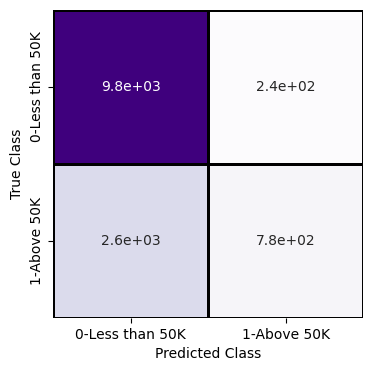

In [40]:
fig, ax= plt.subplots(1,1, figsize=(4,4),dpi=100)

xlabels=['0-Less than 50K','1-Above 50K']
ylabels=['0-Less than 50K','1-Above 50K']

sns.heatmap(conf_matrix1,annot=True, cbar=None, cmap="Purples",xticklabels=xlabels,yticklabels=ylabels,
            linewidths=1,linecolor='black')
ax.set_xlabel('Predicted Class')
ax.set_ylabel('True Class')


In [41]:
from sklearn.metrics import classification_report
names=['0-Less than 50K','1-Above 50K']
print(classification_report(Y_test, y_pred,target_names=names))

                 precision    recall  f1-score   support

0-Less than 50K       0.79      0.98      0.87     10093
    1-Above 50K       0.76      0.23      0.36      3357

       accuracy                           0.79     13450
      macro avg       0.78      0.60      0.62     13450
   weighted avg       0.79      0.79      0.75     13450

